# Sheet 3 - Simulation Exercise (Probit Model - Gibbs and M-H)

In [202]:
using Distributions, StatsPlots, Plots, StatsBase, LinearAlgebra, GraphRecipes
using GaussianMixtures
using LaTeXStrings
pyplot()

┌ Info: Precompiling GraphRecipes [bd48cda9-67a9-57be-86fa-5b3c104eda73]
└ @ Base loading.jl:1192


Plots.PyPlotBackend()

In the probit model we have the similar situation that we have for the linear regression,
hence:
$$
Y = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n
$$
But $Y = 0$ or $1$, so we have to transform the linear equation to fall between 0 and 1.
To do that, we use the cdf for the normal distribution.
$$
Y = \phi(\beta_0 + \beta_1 x_1 + ... + \beta_n x_n)
$$
Note that the cdf will guarantee a value between 0 and 1.

1. Generate a synthetic dataset Y from the probit model for an arbitrary value of β and a matrix X.

In [492]:
n    = 50
beta = [1 -1]
X    = [rand(Normal(0,1),n,1) rand(Normal(0,2),n,1)]

# cdf.(Normal(0,1),X)
# X' * beta
Y = (cdf.(Normal(0,1),X*beta') .>= 0.5).*1;
C = countmap(Y[:])

Dict{Int64,Int64} with 2 entries:
  0 => 22
  1 => 28

2. Introduce the prior distribution on β:
$$\pi(\beta) = N (0, B)$$
for a p × p covariance matrix B. Write a function taking a vector β as argument and returning the log
posterior density function evaluated at β.

Note that
$$
p(\beta \mid Y) \propto \pi(\beta)\prod^n_{i=1}\phi(X_i^T\beta)^{y_i}(1-\phi X_i^T \beta)^{1-y_i}
$$


In [493]:
B = [1.0 0;
     0 1.0]

function LogPosterior(beta)
    post = Y'*logcdf.(Normal(0,1),X*beta') + (1 .- Y)'* logcdf.(Normal(0,1),-X*beta').+ logpdf(MvNormal(B),beta')
    return post[1]
    
end
beta1 = 1.0
beta2 = 5.0
LogPosterior(beta)

-10.90800496502904

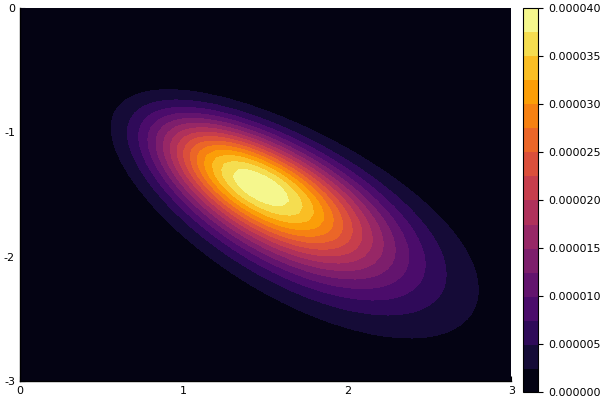

In [498]:
y = -3:0.05:0
x = 0:0.05:3
gridx = repeat(reshape(x, 1, :), length(y), 1)
gridy = repeat(y, 1, length(x))
f(x,y)= exp(LogPosterior([x y]))
Z = map(f, gridx, gridy)
p1 = contour(x,y, f, fill=true)


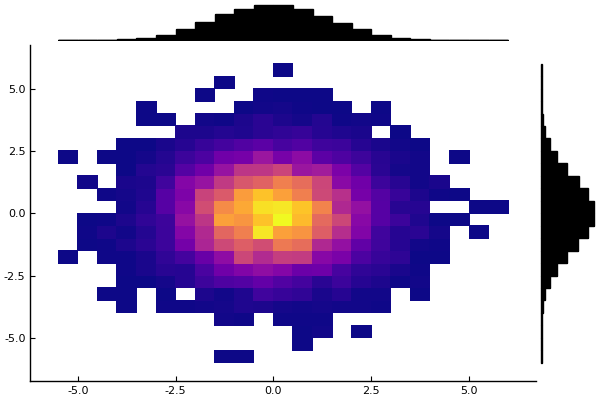

In [320]:
# plot(v[1,:],v[2,:],seriestype=:scatter,markerstrokewidth=0,alpha=0.1,)
marginalhist(v[1,:],v[2,:],seriescolor=:plasma)#seriescolor=:blues,

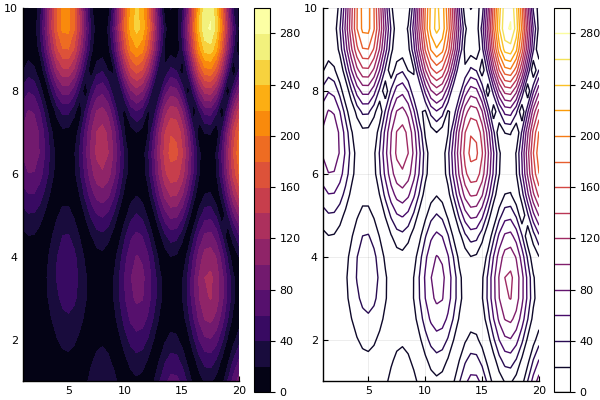

In [392]:
x = 1:0.5:20
y = 1:0.5:10
f(x, y) = begin
        (3x + y ^ 2) * abs(sin(x) + cos(y))
    end
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(f, X, Y)
p1 = contour(x, y, f, fill=true)
p2 = contour(x, y, Z)
plot(p1, p2)